In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

from mrf_cut import segment_image
from bar_example import create_bar, bar_generator, add_gray_noise, add_flip_noise

In [2]:
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p2_results.npy")

In [3]:
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["beta", "perc_noise", "loss"])

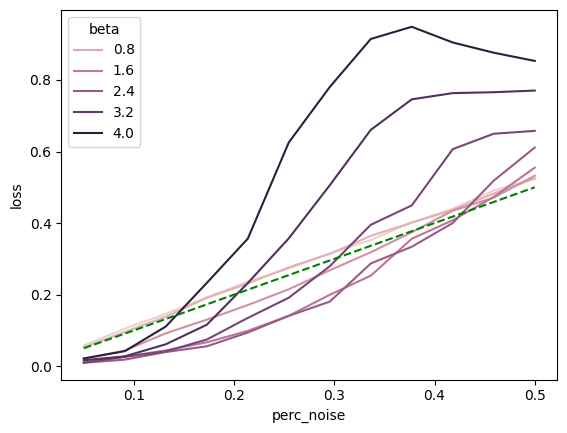

In [4]:
sns.lineplot(df, x="perc_noise", y="loss", hue="beta")
plt.gca().plot(percs, percs, "g--")

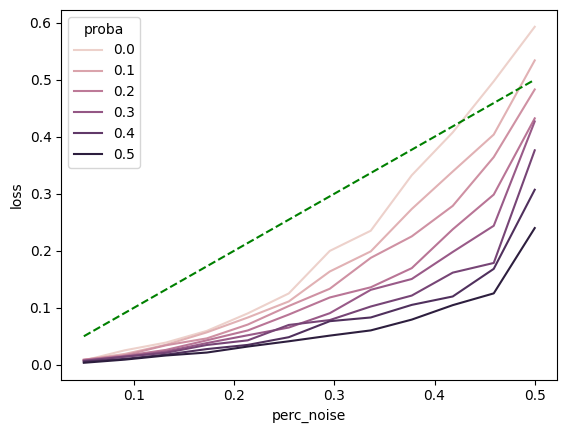

In [10]:
probas = np.linspace(0, 0.5, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p3_results.npy")
rows = []
for b, r in zip(probas, results):
    for p, z in zip(percs, r):
        rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["proba", "perc_noise", "loss"])
sns.lineplot(df, x="perc_noise", y="loss", hue="proba")
plt.gca().plot(percs, percs, "g--")

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
fig.set_constrained_layout(True)

def custom_pairwise1(val1, val2, *args):
    return 2.5

def custom_pairwise2(val1, val2, *args):
    return 4

def unary(val, *args):
    bp = 0.26
    return val * bp, (1 - val) * (1 - bp)

bar_ref = create_bar()

noisy = add_flip_noise(bar_ref, .2)
map_bar1 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise2)
map_bar2 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise1)
noisy_mesh = axs[0].pcolormesh(noisy, vmin=0, vmax=1)
map_mesh = axs[1].pcolormesh(map_bar1, vmin=0, vmax=1)
map_mesh2 = axs[2].pcolormesh(map_bar2, vmin=0, vmax=1)
plt.close()
# This function updates the y-data of the line for each frame
def update(i):
    noisy = add_flip_noise(bar_ref, .2)
    map_bar1 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise2)
    map_bar2 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise1)
    
    noisy_mesh.set_array(noisy)
    map_mesh.set_array(map_bar1)
    map_mesh2.set_array(map_bar2)
    return noisy_mesh, map_mesh, map_mesh2

ani = FuncAnimation(fig, update, frames=range(20), blit=False, interval=100)
HTML(ani.to_jshtml())